x(t) = number of potential activists at day i  
y(t) = number of activeists at day i  
z(t) = number of activists who have 'lost faith' at day i  

Condition: x + y + z = 1

$\beta$: contagion coefficient  
$\gamma$: removal coefficient  
$\alpha$: events per rioter  

$$
\frac{dx}{dt} = -\beta x y
$$
$$
\frac{dy}{dt} = \beta x y - \gamma y
$$
$$
\frac{dz}{dt} = \gamma y
$$

In [23]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# define our coefficients
# if beta and gamma are distributions, I'm assuming they are in respect to time
beta = 1
gamma = 1

# define our initial parameters
nation_pop = 3e9
init_rioters = 5
init_removals = 0

# define our riot ode system as specified above
def ode(t, x):
    return np.array([-beta*x[0]*x[1], beta*x[0]*x[1] - gamma*x[1], gamma*x[1]])

# define the time parameters (days)
t0 = 0
tf = 122

# define the initial condition
y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])

#solve the system
sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))

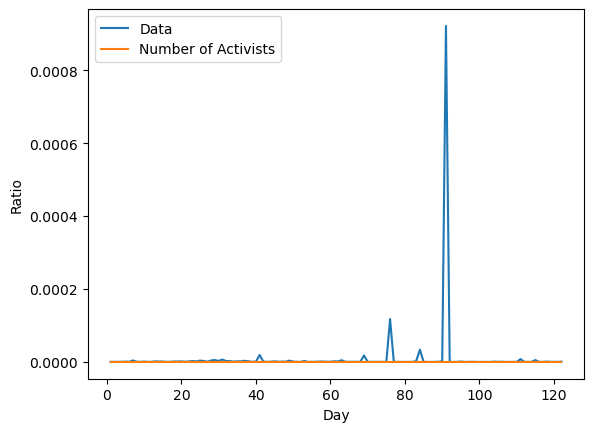

In [29]:
# Minimizing our Model
# Referencing Prob 4 from SIR Lab
data = pd.read_csv("palprot24.csv", index_col=0)
mean_size_truth = data["size_mean"].tolist()

x_vals = np.linspace(1, len(data), len(data))

def calculate_error(params):
    beta, gamma = params

    #solving the solution with params
    beta = 1
    gamma = 1
    # define our initial parameters
    nation_pop = 3e9
    init_rioters = 5
    init_removals = 0
    # define our riot ode system as specified above
    def ode(t, x):
        return np.array([-beta*x[0]*x[1], beta*x[0]*x[1] - gamma*x[1], gamma*x[1]])
    # define the time parameters (days)
    t0 = 0
    tf = 122
    # define the initial condition
    y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])
    #solve the system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 122))

    #to measure error, we want to compare sol.y[1] (# of activists) with the size_mean data
    model_pred = sol.y[1] * nation_pop
    diff = model_pred - mean_size_truth

    return np.linalg.norm(diff)

#our parameters are beta and gamma
#beta is 1/tenthousand
#gamma 
p0 = (1/10000, 1/20000)
final_p = minimize(calculate_error, p0).x

nation_pop = 3e9
init_rioters = 5
init_removals = 0
# define our riot ode system as specified above
def ode(t, x):
    return np.array([-final_p[0]*x[0]*x[1], final_p[0]*x[0]*x[1] - final_p[1]*x[1], final_p[1]*x[1]])
# define the time parameters (days)
t0 = 0
tf = 122
# define the initial condition
y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])
#solve the system
sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 122))

plt.plot(x_vals, np.array(mean_size_truth)/nation_pop, label='Data')
plt.plot(x_vals, sol.y[1], label='Number of Activists')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.legend()
plt.show()